In [28]:
import argparse

import sys
sys.argv = ['']


def parse_args():
    parser = argparse.ArgumentParser()

    parser.add_argument('--train_ratio', type=float, default=0.7, help='train ratio')
    parser.add_argument('--val_ratio', type=float, default=0.1, help='train ratio')
    parser.add_argument('--attack_type', type=str, default='label', help='attack type', choices=["label", "edge", "random", "trigger"])
    parser.add_argument('--unlearning_model', type=str, default='contrastive', help='unlearning method', choices=["original", "gradient_ascent", "gnndelete", "gnndelete_ni", "gif", "utu", "contrastive", "retrain", "scrub", "megu"])
    parser.add_argument('--gnn', type=str, default='gcn', help='GNN architecture', choices=['gcn', 'gat', 'gin'])
    # parser.add_argument('--in_dim', type=int, default=128, help='input dimension')
    parser.add_argument('--hidden_dim', type=int, default=64, help='hidden dimension')
    parser.add_argument('--unlearning_epochs', type=int, default=50, help='number of epochs to unlearn for')
    # parser.add_argument('--out_dim', type=int, default=64, help='output dimension')
    parser.add_argument('--request', type=str, default='node', help='unlearning request', choices=['node', 'edge'])
    parser.add_argument('--edge_attack_type', type=str, default='specific', help='edge attack type', choices=['random', 'specific'])

    # Data
    parser.add_argument('--data_dir', type=str, default='./data', help='data dir')
    parser.add_argument('--db_name', type=str, default='hp_tuning', help='db name')
    
    # parser.add_argument('--df', type=str, default='in', help='Df set to use')
    # parser.add_argument('--df_idx', type=str, default=None, help='indices of data to be deleted')
    parser.add_argument('--df_size', type=float, default=0.5, help='Forgetting Fraction')
    parser.add_argument('--test_poison_fraction', type=float, default=0.2, help='Test Poisoning Fraction')
    parser.add_argument('--poison_tensor_size', type=int, default=100, help='Poison Tensor Size')
    parser.add_argument('--dataset', type=str, default='Cora', help='dataset')
    parser.add_argument('--random_seed', type=int, default=1, help='random seed')
    # parser.add_argument('--batch_size', type=int, default=2048, help='batch size for GraphSAINTRandomWalk sampler')
    # parser.add_argument('--walk_length', type=int, default=2, help='random walk length for GraphSAINTRandomWalk sampler')
    # parser.add_argument('--num_steps', type=int, default=32, help='number of steps for GraphSAINTRandomWalk sampler')

    # Training
    # parser.add_argument("--suffix", type=str, default=None, help="name suffix for #wandb run")
    # parser.add_argument("--mode", type=str, default="disabled", help="#wandb mode")
    parser.add_argument('--train_lr', type=float, default=0.005191475570177285, help='initial learning rate')
    parser.add_argument('--unlearn_lr', type=float, default=0.015, help='unlearn learning rate')
    parser.add_argument('--weight_decay', type=float, default=0.00016211813194850176, help='weight decay')
    parser.add_argument('--optimizer', type=str, default='Adam', help='optimizer to use')
    parser.add_argument('--training_epochs', type=int, default=1208, help='number of epochs to train')
    parser.add_argument('--valid_freq', type=int, default=30, help='# of epochs to do validation')
    parser.add_argument('--checkpoint_dir', type=str, default='./checkpoint', help='checkpoint folder')
    parser.add_argument('--alpha', type=float, default=0.5, help='alpha in loss function')
    parser.add_argument('--neg_sample_random', type=str, default='non_connected', help='type of negative samples for randomness')
    parser.add_argument('--loss_fct', type=str, default='mse_mean', help='loss function. one of {mse, kld, cosine}')
    parser.add_argument('--loss_type', type=str, default='both_layerwise', help='type of loss. one of {both_all, both_layerwise, only2_layerwise, only2_all, only1}')

    # GraphEraser
    parser.add_argument('--num_clusters', type=int, default=10, help='top k for evaluation')
    parser.add_argument('--kmeans_max_iters', type=int, default=1, help='top k for evaluation')
    parser.add_argument('--shard_size_delta', type=float, default=0.005)
    parser.add_argument('--terminate_delta', type=int, default=0)

    # GraphEditor
    parser.add_argument('--eval_steps', type=int, default=1)
    parser.add_argument('--runs', type=int, default=1)
    parser.add_argument('--num_remove_links', type=int, default=11)
    parser.add_argument('--parallel_unlearning', type=int, default=4)
    parser.add_argument('--lam', type=float, default=0)
    parser.add_argument('--regen_feats', action='store_true')
    parser.add_argument('--regen_neighbors', action='store_true')
    parser.add_argument('--regen_links', action='store_true')
    parser.add_argument('--regen_subgraphs', action='store_true')
    parser.add_argument('--hop_neighbors', type=int, default=20)


    # Evaluation
    parser.add_argument('--topk', type=int, default=500, help='top k for evaluation')
    parser.add_argument('--eval_on_cpu', type=bool, default=False, help='whether to evaluate on CPU')

    # KG
    parser.add_argument('--num_edge_type', type=int, default=None, help='number of edges types')

    # GIF
    parser.add_argument('--iteration', type=int, default=100)
    parser.add_argument('--scale', type=int, default=100000)
    parser.add_argument('--damp', type=float, default=0.1)

    # Scrub
    parser.add_argument('--unlearn_iters', type=int, default=50, help='number of epochs to train (default: 31)')
    parser.add_argument('--kd_T', type=float, default=4, help='Knowledge distilation temperature for SCRUB')
    parser.add_argument('--scrubAlpha', type=float, default=1, help='KL from og_model constant for SCRUB, higher incentivizes closeness to ogmodel')
    parser.add_argument('--msteps', type=int, default=15, help='Maximization steps on forget set for SCRUB')
    parser.add_argument('--wd', type=float, default=0.0005, help='learning rate (default: 0.01)')


    # contrastive
    parser.add_argument('--contrastive_epochs_1', type=int, default=30, help="epochs for contrastive unlearning")
    parser.add_argument('--contrastive_epochs_2', type=int, default=10, help="epochs for contrastive unlearning")
    parser.add_argument('--maximise_epochs', type=int, default=0, help="epochs for grad asc in contrastive unlearning")
    parser.add_argument('--contrastive_margin', type=float, default=500, help="margin for the contrastive loss")
    parser.add_argument('--contrastive_lambda', type=float, default=0.8, help="weight for the task loss [1 - lambda] is used for the contrastive loss")
    parser.add_argument('--k_hop', type=int, default=2, help="number of hops for the data sampling")
    parser.add_argument('--contrastive_frac', type=float, default=0.1, help="fraction of nodes to sample for contrastive loss")

    # MEGU
    parser.add_argument('--kappa', type=float, default=0.01)
    parser.add_argument('--alpha1', type=float, default=0.8)
    parser.add_argument('--alpha2', type=float, default=0.5)
    
    # UTILITIES
    parser.add_argument('--embs_all', action='store_true', help='whether to plot embeddings in embs.py')
    parser.add_argument('--embs_unlearn', action='store_true', help='whether to plot embeddings in embs.py')

    args = parser.parse_args(args=[])
    return args

args = parse_args()
args.embs_unlearn = True


In [29]:
import os, math
import copy
from pprint import pprint
import time
import scipy.sparse as sp
# import wandb
import numpy as np
from tqdm import tqdm, trange
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.utils import negative_sampling, k_hop_subgraph, to_scipy_sparse_matrix
from torch_geometric.loader import GraphSAINTRandomWalkSampler

from trainers.base import Trainer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def time_it(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        elapsed_time = end_time - start_time
        #print(f"Function '{func.__name__}' took {elapsed_time:.4f} seconds to execute.")
        return result

    return wrapper


class ContrastiveUnlearnTrainer(Trainer):
    def __init__(self, model, data, optimizer, args):
        super().__init__(model, data, optimizer)
        self.args = args
        self.attacked_idx = data.attacked_idx
        self.embeddings = None
        self.criterion = torch.nn.CrossEntropyLoss()

    def reverse_features(self, features):
        reverse_features = features.clone()
        if self.args.request== "edge":
            for idx in self.data.poisoned_nodes:
                reverse_features[idx] = 1-reverse_features[idx]
            return reverse_features

        for idx in self.attacked_idx:
            reverse_features[idx] = 1-reverse_features[idx]
        return reverse_features

    def get_sample_points(self):
        if self.args.request == "edge":
            og_logits = F.softmax(self.model(self.data.x, self.data.edge_index), dim=1)
            temp_features = self.data.x.clone()
            reverse_feature = self.reverse_features(temp_features)
            final_logits = F.softmax(self.model(reverse_feature, self.data.edge_index), dim=1)
            diff = torch.abs(og_logits - final_logits)
            diff = torch.mean(diff, dim=1)
            diff = diff[self.data.poisoned_nodes]
            frac = self.args.contrastive_frac
            _, indices = torch.topk(diff, int(frac * len(self.data.poisoned_nodes)), largest=True)
            influence_nodes_with_unlearning_nodes = self.data.poisoned_nodes[indices]
            print(f"Nodes influenced: {len(influence_nodes_with_unlearning_nodes)}")
            self.data.sample_mask = torch.zeros(self.data.num_nodes, dtype=torch.bool)
            self.data.sample_mask[influence_nodes_with_unlearning_nodes] = True

            poisoned_edges = self.data.edge_index[:, self.attacked_idx]
            negative_sample_dict= {int: set()}

            for i in range(len(poisoned_edges[0])):
                toNode= poisoned_edges[0][i].item()
                fromNode= poisoned_edges[1][i].item()

                if toNode not in negative_sample_dict:
                    negative_sample_dict[toNode] = set()
                negative_sample_dict[toNode].add(fromNode)

                if fromNode not in negative_sample_dict:
                    negative_sample_dict[fromNode] = set()
                negative_sample_dict[fromNode].add(toNode)
            self.negative_sample_dict= negative_sample_dict
            return

        subset, _, _, _ = k_hop_subgraph(
            self.attacked_idx.clone().detach(), self.args.k_hop, self.data.edge_index
        )

        # remove attacked nodes from the subset
        subset = subset[~np.isin(subset.cpu(), self.attacked_idx.cpu())]

        og_logits = F.softmax(self.model(self.data.x, self.data.edge_index), dim=1)
        temp_features = self.data.x.clone()
        reverse_feature = self.reverse_features(temp_features)
        final_logits = F.softmax(self.model(reverse_feature, self.data.edge_index), dim=1)

        diff = torch.abs(og_logits - final_logits)

        # average across all classes
        diff = torch.mean(diff, dim=1)

        # take diffs of only the subset without the attacked nodes
        diff = diff[subset]

        #  get the top 10% of the indices
        frac = self.args.contrastive_frac
        _, indices = torch.topk(diff, int(frac * len(subset)), largest=True)

        influence_nodes_with_unlearning_nodes = indices

        print(f"Nodes influenced: {len(influence_nodes_with_unlearning_nodes)}")

        self.data.sample_mask = torch.zeros(self.data.num_nodes, dtype=torch.bool)
        self.data.sample_mask[influence_nodes_with_unlearning_nodes] = True

    @time_it
    def task_loss(self, mask=None):
        # use the retain mask to calculate the loss
        if self.args.request == "edge":
            self.embeddings = self.model(self.data.x, self.data.edge_index[:, self.data.dr_mask])
        
        if mask is None:    
            try:
                mask = self.data.retain_mask
            except:
                mask = self.data.train_mask

        loss = self.criterion(self.embeddings[mask], self.data.y[mask])
        return loss
    
    def grad_ascent_loss(self):
        self.model = self.model.to(device)
        self.data = self.data.to(device)
        self.embeddings = self.model(self.data.x, self.data.edge_index)
        if not hasattr(self.data, "poison_mask"):
            self.data.poison_mask = torch.zeros(self.data.num_nodes, dtype=torch.bool)
            self.data.poison_mask[self.data.poisoned_nodes] = True

        loss = -self.task_loss(mask=self.data.poison_mask)
        return loss

    @time_it
    def contrastive_loss(self, pos_dist, neg_dist, margin):
        pos_loss = torch.mean(pos_dist)
        neg_loss = torch.mean(F.relu(margin - neg_dist))
        loss = pos_loss + neg_loss
        return loss

    @time_it
    def unlearn_loss(self, pos_dist, neg_dist, margin=1.0, lmda=0.8):
        if lmda == 1:
            return self.task_loss()
        return lmda * self.task_loss() + (1 - lmda) * self.contrastive_loss(
            pos_dist, neg_dist, margin
        )

    def calc_distances(self, nodes, positive_samples, negative_samples):
        # Vectorized contrastive loss calculation
        anchors = self.embeddings[nodes].unsqueeze(1)  # Shape: (N, 1, D)
        positives = self.embeddings[positive_samples]  # Shape: (N, P, D)
        negatives = self.embeddings[negative_samples]  # Shape: (N, Q, D)

        # Euclidean distance between anchors and positives and take mean
        pos_dist = torch.mean(torch.norm(anchors - positives, dim=-1), dim=-1)
        # Euclidean distance between anchors and negatives and take mean
        neg_dist = torch.mean(torch.norm(anchors - negatives, dim=-1), dim=-1)

        return pos_dist, neg_dist

    @time_it
    def store_subset(self):
        # store the subset of the idx in a dictionary
        sample_idx = torch.where(self.data.sample_mask)[0]
        subset_dict = {}
        for idx in sample_idx:
            idx_ = idx.reshape(-1)
            subset, _, _, _ = k_hop_subgraph(
                idx_, self.args.k_hop, self.data.edge_index
            )
            subset_set = set(subset.tolist())
            subset_dict[idx.item()] = subset_set
        self.subset_dict = subset_dict

    def store_edge_index_for_poison(self, data, idx, hop=1):
        edge_index_for_poison_dict = {}
        for idx in range(len(data.train_mask)):
            if data.retain_mask[idx]:
                _, edge_index_for_poison, _, _ = k_hop_subgraph(idx, hop, data.edge_index)
                edge_index_for_poison_dict[idx] = edge_index_for_poison
        self.edge_index_for_poison_dict = edge_index_for_poison_dict

    @time_it
    def get_distances_batch(self, batch_size=64):
        st = time.time()
        self.embeddings = self.model(self.data.x, self.data.edge_index)
        #print(f"Time taken to get embeddings: {time.time() - st}")

        num_masks = len(self.data.train_mask)
        pos_dist = torch.zeros(num_masks)
        neg_dist = torch.zeros(num_masks)

        pos_dist = pos_dist.to(device)
        neg_dist = neg_dist.to(device)

        sample_indices = torch.where(self.data.sample_mask)[0]
        num_samples = len(sample_indices)

        #print(f"Number of samples: {num_samples}")

        attacked_set = set(self.attacked_idx.tolist())

        st = time.time()
        calc_time = 0

        for i in range(0, num_samples, batch_size):
            batch_indices = sample_indices[i : i + batch_size]
            batch_size = len(batch_indices)

            batch_positive_samples = [
                list(self.subset_dict[idx.item()] - attacked_set)
                for idx in batch_indices
            ]
            batch_negative_samples = [list(attacked_set) for _ in range(batch_size)]

            # Pad and create dense batches
            max_pos = max(len(s) for s in batch_positive_samples)
            max_neg = max(len(s) for s in batch_negative_samples)

            batch_pos = torch.stack(
                [
                    torch.tensor(s + [0] * (max_pos - len(s)))
                    for s in batch_positive_samples
                ]
            )
            batch_neg = torch.stack(
                [
                    torch.tensor(s + [0] * (max_neg - len(s)))
                    for s in batch_negative_samples
                ]
            )

            st_2 = time.time()
            batch_pos_dist, batch_neg_dist = self.calc_distances(
                batch_indices, batch_pos, batch_neg
            )
            calc_time += time.time() - st_2

            pos_dist[batch_indices] = batch_pos_dist.to(pos_dist.device)
            neg_dist[batch_indices] = batch_neg_dist.to(neg_dist.device)

        #print(f"Average time taken to calculate distances: {calc_time/num_samples}")
        #print(f"Average time taken to get distances: {(time.time() - st)/num_samples}")

        return pos_dist, neg_dist

    def get_distances_edge(self, batch_size=64):
        # attacked edge index contains all the edges that were maliciously added
        self.embeddings = self.model(self.data.x, self.data.edge_index)
        num_masks = len(self.data.train_mask)
        pos_dist = torch.zeros(num_masks).to(device)
        neg_dist = torch.zeros(num_masks).to(device)

        sample_indices = torch.where(self.data.sample_mask)[0]
        num_samples = len(sample_indices)

        #Batchwise positive and negative samples created
        for i in range(0, num_samples, batch_size):
            batch_indices = sample_indices[i : i + batch_size]
            batch_size = len(batch_indices)
            
            batch_positive_samples = [
                list(self.subset_dict[idx.item()] - self.negative_sample_dict[idx.item()])
                for idx in batch_indices
            ]
            batch_negative_samples = [list(self.negative_sample_dict[idx.item()]) for idx in batch_indices]
            # Pad and create dense batches
            max_pos = max(len(s) for s in batch_positive_samples)
            max_neg = max(len(s) for s in batch_negative_samples)

            batch_pos = torch.stack(
                [
                    torch.tensor(s + [0] * (max_pos - len(s)))
                    for s in batch_positive_samples
                ]
            )
            batch_neg = torch.stack(
                [
                    torch.tensor(s + [0] * (max_neg - len(s)))
                    for s in batch_negative_samples
                ]
            )

            # st_2 = time.time()
            batch_pos_dist, batch_neg_dist = self.calc_distances(
                batch_indices, batch_pos, batch_neg
            )
            # calc_time += time.time() - st_2

            pos_dist[batch_indices] = batch_pos_dist.to(pos_dist.device)
            neg_dist[batch_indices] = batch_neg_dist.to(neg_dist.device)

        pos_dist = torch.tensor(pos_dist)
        neg_dist = torch.tensor(neg_dist)
        return pos_dist, neg_dist

    @time_it
    def get_model_embeddings(self):
        self.embeddings = self.model(self.data.x, self.data.edge_index)

    def train_node(self):
        self.model = self.model.to(device)
        self.data = self.data.to(device)
        args = self.args
        optimizer = self.optimizer
        # attacked idx must be a list of nodes
        for epoch in trange(
            args.contrastive_epochs_1 + args.contrastive_epochs_2 + args.maximise_epochs, desc="Unlearning"
        ):
            self.model.train()
            self.embeddings = self.model(self.data.x, self.data.edge_index)
            if epoch <= args.contrastive_epochs_1:
                pos_dist, neg_dist = self.get_distances_batch()
                lmda = args.contrastive_lambda
                loss = self.unlearn_loss(
                    pos_dist, neg_dist, margin=args.contrastive_margin, lmda=lmda
                )
            elif epoch <= args.contrastive_epochs_1 + args.maximise_epochs:
                lmda = 1
                loss = self.grad_ascent_loss()
            else:
                pos_dist = None
                neg_dist = None
                lmda = 1
                loss = self.unlearn_loss(
                    pos_dist, neg_dist, margin=args.contrastive_margin, lmda=lmda
                )
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    def train_edge(self):
        # attack idx must be a list of tuples (u,v)
        args = self.args
        optimizer = self.optimizer
        
        for epoch in trange(
            args.contrastive_epochs_1 + args.contrastive_epochs_2, desc="Unlearning"
        ):
            self.model.train()
            self.embeddings = self.model(self.data.x, self.data.edge_index)
            if epoch <= args.contrastive_epochs_1:
                pos_dist, neg_dist = self.get_distances_edge()
                lmda = args.contrastive_lambda
            else:
                pos_dist = None
                neg_dist = None
                lmda = 1
            loss = self.unlearn_loss(
                pos_dist, neg_dist, margin=args.contrastive_margin, lmda=lmda
            )
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        return

    def train(self):

        # attack_idx is an extra needed parameter which is defined above in both node and edge functions
        self.data.retain_mask = self.data.train_mask.clone()
        self.get_sample_points()
        self.store_subset()

        start_time = time.time()
        if self.args.request == "node":
            self.train_node()
        elif self.args.request == "edge":
            self.train_edge()
        end_time = time.time()
        train_acc, msc_rate, f1 = self.evaluate(is_dr=True, use_val=True)
        print(f"Train Acc: {train_acc}, Misclassification: {msc_rate},  F1 Score: {f1}")

        print(f"Training time: {end_time - start_time}")

        return train_acc, msc_rate, end_time - start_time

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from attacks.edge_attack import edge_attack_specific_nodes
from attacks.feature_attack import trigger_attack
from attacks.label_flip import label_flip_attack
from framework import utils
from models.deletion import GCNDelete
from models.models import GCN


class_dataset_dict = {
    'Cora': {
        'class1': 57,
        'class2': 33,
    },
    'PubMed': {
        'class1': 2,
        'class2': 1,
    },
}

utils.seed_everything(args.random_seed)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

def plot_embeddings(model, data, class1, class2, is_dr=False, mask="test", name=""):
    # Set the model to evaluation mode
    model.eval()

    # Forward pass: get embeddings
    with torch.no_grad():
        if is_dr and args.unlearning_model != "scrub":
            embeddings = model(data.x, data.edge_index[:, data.dr_mask])
        else:
            embeddings = model(data.x, data.edge_index)

    # If embeddings have more than 2 dimensions, apply t-SNE
    print("Embeddings shape:", embeddings.shape)
    if embeddings.shape[1] > 2:
        embeddings = TSNE(n_components=2).fit_transform(embeddings.cpu())
        embeddings = torch.tensor(embeddings).to(device)
    print("Embeddings shape after t-SNE:", embeddings.shape)
    # Get the mask (either test, train, or val)
    if mask == "test":
        mask = data.test_mask
    elif mask == "train":
        mask = data.train_mask
    else:
        mask = data.val_mask

    # Filter embeddings and labels based on the mask
    embeddings = embeddings[mask]
    labels = data.y[mask]

    # Create masks for class1, class2, and other classes
    class1_mask = (labels == class1)
    class2_mask = (labels == class2)
    other_mask = ~(class1_mask | class2_mask)

    # convert masks to numpy
    class1_mask = class1_mask.cpu().numpy()
    class2_mask = class2_mask.cpu().numpy()
    other_mask = other_mask.cpu().numpy()

    # Prepare the plot
    plt.figure(figsize=(10, 8))
    sns.set(style="whitegrid")

    # convert to numpy
    embeddings = embeddings.cpu().numpy()
    labels = labels.cpu().numpy()

    # Plot class1
    plt.scatter(embeddings[class1_mask, 0], embeddings[class1_mask, 1], label=f'Class {class1}', color='blue', alpha=0.6)
    # Plot class2
    plt.scatter(embeddings[class2_mask, 0], embeddings[class2_mask, 1], label=f'Class {class2}', color='red', alpha=0.6)
    # Plot other classes
    plt.scatter(embeddings[other_mask, 0], embeddings[other_mask, 1], label='Other Classes', color='gray', alpha=0.4)

    # Add legend and labels
    plt.legend()
    plt.title("Embeddings Visualization")
    plt.xlabel("Embedding Dimension 1")
    plt.ylabel("Embedding Dimension 2")

    # Save the plot
    os.makedirs("./plots", exist_ok=True)
    plt.savefig(f"./plots/{args.dataset}_{args.attack_type}_{args.df_size}_{args.random_seed}_{name}_embeddings.png")
    plt.show()


def train():
    # dataset
    print("==TRAINING==")
    clean_data = utils.get_original_data(args.dataset)
    utils.train_test_split(clean_data, args.random_seed, args.train_ratio, args.val_ratio)
    utils.prints_stats(clean_data)
    clean_model = GCN(clean_data.num_features, args.hidden_dim, clean_data.num_classes)

    optimizer = torch.optim.Adam(
        clean_model.parameters(), lr=args.train_lr, weight_decay=args.weight_decay
    )
    clean_trainer = Trainer(clean_model, clean_data, optimizer, args.training_epochs)
    clean_trainer.train()

    if args.attack_type != "trigger":
        forg, util = clean_trainer.get_score(args.attack_type, class1=class_dataset_dict[args.dataset]['class1'], class2=class_dataset_dict[args.dataset]['class2'])

        print(f"==OG Model==\nForget Ability: {forg}, Utility: {util}")
        # logger.log_result(args.random_seed, "original", {"forget": forg, "utility": util})
        if args.embs_all:
            plot_embeddings(clean_model, clean_data, class_dataset_dict[args.dataset]['class1'], class_dataset_dict[args.dataset]['class2'], is_dr=False, mask="test", name="original")

    return clean_data


def poison(clean_data=None):
    if clean_data is None:
        # load the poisoned data and model and indices from np file
        poisoned_data = torch.load(
            f"./data/{args.dataset}_{args.attack_type}_{args.df_size}_{args.random_seed}_poisoned_data.pt"
        )
        poisoned_indices = torch.load(
            f"./data/{args.dataset}_{args.attack_type}_{args.df_size}_{args.random_seed}_poisoned_indices.pt"
        )
        poisoned_model = torch.load(
            f"./data/{args.dataset}_{args.attack_type}_{args.df_size}_{args.random_seed}_poisoned_model.pt"
        )

        optimizer = torch.optim.Adam(
            poisoned_model.parameters(),
            lr=args.train_lr,
            weight_decay=args.weight_decay,
        )
        poisoned_trainer = Trainer(
            poisoned_model, poisoned_data, optimizer, args.training_epochs
        )
        poisoned_trainer.evaluate()

        forg, util = poisoned_trainer.get_score(args.attack_type, class1=class_dataset_dict[args.dataset]['class1'], class2=class_dataset_dict[args.dataset]['class2'])
        print(f"==Poisoned Model==\nForget Ability: {forg}, Utility: {util}")
        if args.embs_all:
            plot_embeddings(poisoned_model, poisoned_data, class_dataset_dict[args.dataset]['class1'], class_dataset_dict[args.dataset]['class2'], is_dr=False, mask="test", name="poisoned")
        # logger.log_result(
        #     args.random_seed, "poisoned", {"forget": forg, "utility": util}
        # )

        # prirnt(poisoned_trainer.calculate_PSR())
        return poisoned_data, poisoned_indices, poisoned_model

    print("==POISONING==")
    if args.attack_type == "label":
        poisoned_data, poisoned_indices = label_flip_attack(
            clean_data, args.df_size, args.random_seed
        )
    elif args.attack_type == "edge":
        poisoned_data, poisoned_indices = edge_attack_specific_nodes(
            clean_data, args.df_size, args.random_seed
        )
    elif args.attack_type == "random":
        poisoned_data = copy.deepcopy(clean_data)
        poisoned_indices = torch.randperm(clean_data.num_nodes)[
            : int(clean_data.num_nodes * args.df_size)
        ]
    elif args.attack_type == "trigger":
        poisoned_data, poisoned_indices = trigger_attack(
            clean_data, args.df_size, args.poison_tensor_size, args.random_seed, args.test_poison_fraction, target_class=57
        )
    poisoned_data = poisoned_data.to(device)

    if "gnndelete" in args.unlearning_model:
        # poisoned_model = GCNDelete(poisoned_data.num_features, args.hidden_dim, poisoned_data.num_classes)
        poisoned_model = GCN(
            poisoned_data.num_features, args.hidden_dim, poisoned_data.num_classes
        )
    else:
        poisoned_model = GCN(
            poisoned_data.num_features, args.hidden_dim, poisoned_data.num_classes
        )

    optimizer = torch.optim.Adam(
        poisoned_model.parameters(), lr=args.train_lr, weight_decay=args.weight_decay
    )
    poisoned_trainer = Trainer(
        poisoned_model, poisoned_data, optimizer, args.training_epochs
    )
    poisoned_trainer.train()

    # save the poisoned data and model and indices to np file
    os.makedirs("./data", exist_ok=True)

    # torch.save(
    #     poisoned_model,
    #     f"./data/{args.dataset}_{args.attack_type}_{args.df_size}_{args.random_seed}_poisoned_model.pt",
    # )

    # torch.save(
    #     poisoned_data,
    #     f"./data/{args.dataset}_{args.attack_type}_{args.df_\
        # size}_{args.random_seed}_poisoned_data.pt",
    # )
    # torch.save(
    #     poisoned_indices,
    #     f"./data/{args.dataset}_{args.attack_type}_{args.df_size}_{args.random_seed}_poisoned_indices.pt",
    # )

    forg, util = poisoned_trainer.get_score(args.attack_type, class1=class_dataset_dict[args.dataset]['class1'], class2=class_dataset_dict[args.dataset]['class2'])
    print(f"==Poisoned Model==\nForget Ability: {forg}, Utility: {util}")
    if args.embs_all:
        plot_embeddings(poisoned_model, poisoned_data, class_dataset_dict[args.dataset]['class1'], class_dataset_dict[args.dataset]['class2'], is_dr=False, mask="test", name="poisoned")
    # logger.log_result(args.random_seed, "poisoned", {"forget": forg, "utility": util})
    # print(f"PSR: {poisoned_trainer.calculate_PSR()}")
    return poisoned_data, poisoned_indices, poisoned_model


def unlearn(poisoned_data, poisoned_indices, poisoned_model):
    print("==UNLEARNING==")

    utils.find_masks(
        poisoned_data, poisoned_indices, args, attack_type=args.attack_type
    )
    if "gnndelete" in args.unlearning_model:
        unlearn_model = GCNDelete(
            poisoned_data.num_features,
            args.hidden_dim,
            poisoned_data.num_classes,
            mask_1hop=poisoned_data.sdf_node_1hop_mask,
            mask_2hop=poisoned_data.sdf_node_2hop_mask,
            mask_3hop=poisoned_data.sdf_node_3hop_mask,
        )

        # copy the weights from the poisoned model
        state_dict = poisoned_model.state_dict()
        state_dict["deletion1.deletion_weight"] = unlearn_model.deletion1.deletion_weight
        state_dict["deletion2.deletion_weight"] = unlearn_model.deletion2.deletion_weight
        state_dict["deletion3.deletion_weight"] = unlearn_model.deletion3.deletion_weight


        # copy the weights from the poisoned model
        unlearn_model.load_state_dict(state_dict)

        optimizer_unlearn = utils.get_optimizer(args, unlearn_model)
        unlearn_trainer = utils.get_trainer(
            args, unlearn_model, poisoned_data, optimizer_unlearn
        )
        unlearn_trainer.train()
    elif "retrain" in args.unlearning_model:
        unlearn_model = GCN(
            poisoned_data.num_features, args.hidden_dim, poisoned_data.num_classes
        )
        optimizer_unlearn = utils.get_optimizer(args, unlearn_model)
        unlearn_trainer = utils.get_trainer(
            args, unlearn_model, poisoned_data, optimizer_unlearn
        )
        unlearn_trainer.train()
    else:
        unlearn_model = copy.deepcopy(poisoned_model)
        optimizer_unlearn = utils.get_optimizer(args, unlearn_model)
        st = time.time()
        unlearn_trainer = utils.get_trainer(
            args, unlearn_model, poisoned_data, optimizer_unlearn
        )
        print("Time to get trainer: ", time.time() - st)
        unlearn_trainer.train()
    forg, util = unlearn_trainer.get_score(args.attack_type, class1=class_dataset_dict[args.dataset]['class1'], class2=class_dataset_dict[args.dataset]['class2'])
    print(f"==Unlearned Model==\nForget Ability: {forg}, Utility: {util}")
    if args.embs_all or args.embs_unlearn:
        plot_embeddings(unlearn_model, poisoned_data, class_dataset_dict[args.dataset]['class1'], class_dataset_dict[args.dataset]['class2'], is_dr=True, mask="test", name=args.unlearning_model)
    # logger.log_result(
    #     args.random_seed, args.unlearning_model, {"forget": forg, "utility": util}
    # )
    print("==UNLEARNING DONE==")

In [31]:
clean_data = train()
poisoned_data, poisoned_idx, poisoned_model = poison(clean_data)


==TRAINING==


Number of nodes:  19793
Number of edges:  126842
Number of features:  8710
Number of classes:  70
Number of training nodes:  13855
Number of testing nodes:  3959


Epoch: 100%|██████████| 1208/1208 [00:14<00:00, 85.46it/s]


Poisoned class: 57 -> 33
==OG Model==
Forget Ability: 0.8022075260804769, Utility: 0.5929530411262132
==POISONING==
Flipping 287 labels from class 57 to class 33 and vice versa
Poisoned 287 labels in total from class 57 and class 33


Epoch: 100%|██████████| 1208/1208 [00:13<00:00, 87.60it/s]


Poisoned class: 57 -> 33
==Poisoned Model==
Forget Ability: 0.4724913065077, Utility: 0.5435422475159405


In [32]:
best_params_dict = {
    "contrastive": {
        "contrastive_epochs_1": 30,
        "contrastive_epochs_2": 25,
        "maximise_epochs": 0,
        "unlearn_lr": 0.03743,
        "weight_decay": 0.000061,
        "contrastive_margin": 	701.90,
        "contrastive_lambda": 0.553,
        "contrastive_frac": 0.08411,
        "k_hop": 2,
    },
}

Namespace(train_ratio=0.7, val_ratio=0.1, attack_type='label', unlearning_model='contrastive', gnn='gcn', hidden_dim=64, unlearning_epochs=50, request='node', edge_attack_type='specific', data_dir='./data', db_name='hp_tuning', df_size=0.5, test_poison_fraction=0.2, poison_tensor_size=100, dataset='Cora', random_seed=1, train_lr=0.005191475570177285, unlearn_lr=0.03743, weight_decay=6.1e-05, optimizer='Adam', training_epochs=1208, valid_freq=30, checkpoint_dir='./checkpoint', alpha=0.5, neg_sample_random='non_connected', loss_fct='mse_mean', loss_type='both_layerwise', num_clusters=10, kmeans_max_iters=1, shard_size_delta=0.005, terminate_delta=0, eval_steps=1, runs=1, num_remove_links=11, parallel_unlearning=4, lam=0, regen_feats=False, regen_neighbors=False, regen_links=False, regen_subgraphs=False, hop_neighbors=20, topk=500, eval_on_cpu=False, num_edge_type=None, iteration=100, scale=100000, damp=0.1, unlearn_iters=50, kd_T=4, scrubAlpha=1, msteps=15, wd=0.0005, contrastive_epochs_

Unlearning: 100%|██████████| 55/55 [00:05<00:00,  9.70it/s]
/home/akshit.sinha/miniconda3/envs/gunlr/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/akshit.sinha/miniconda3/envs/gunlr/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Train Acc: 0.6068721576553815, Misclassification: 0.057291666666666664,  F1 Score: 0.6068721576553815
Training time: 5.673328638076782
Poisoned class: 57 -> 33
==Unlearned Model==
Forget Ability: 0.48404255319148937, Utility: nan
Embeddings shape: torch.Size([19793, 70])


Embeddings shape after t-SNE: torch.Size([19793, 2])


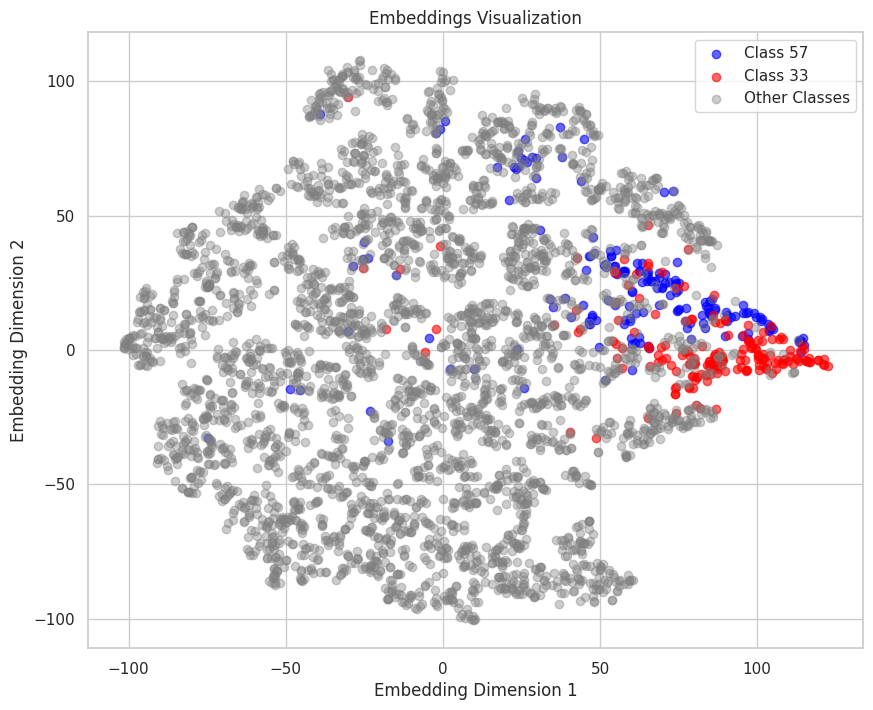

==UNLEARNING DONE==


In [34]:
best_params = best_params_dict[args.unlearning_model]

print(args)

# set args attributes
for attr in best_params:
    setattr(args, attr, best_params[attr])

pprint(args)


unlearn(poisoned_data, poisoned_idx, poisoned_model)